In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
import seaborn as sns

In [2]:
# Importing Naive Bayes Classifier and other modules
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
# Preparing the classifier
classifier = GaussianNB()

In [4]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Prawn/'

In [5]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

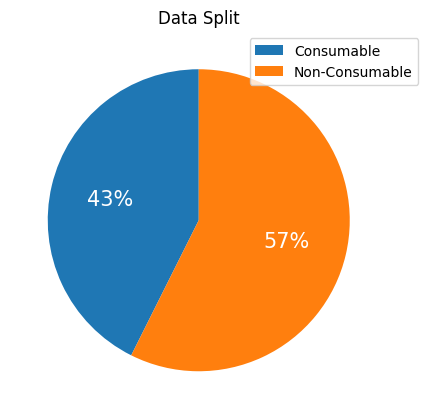

In [6]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [7]:
width = 100
height = 100
# Making standard size for the different class
sample_size = 50

In [8]:
# Case 1: Prediction in RGB Color Space

In [9]:
# Converting BGR Images to RGB Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 23.83344


In [10]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(100, 100, 100, 3)

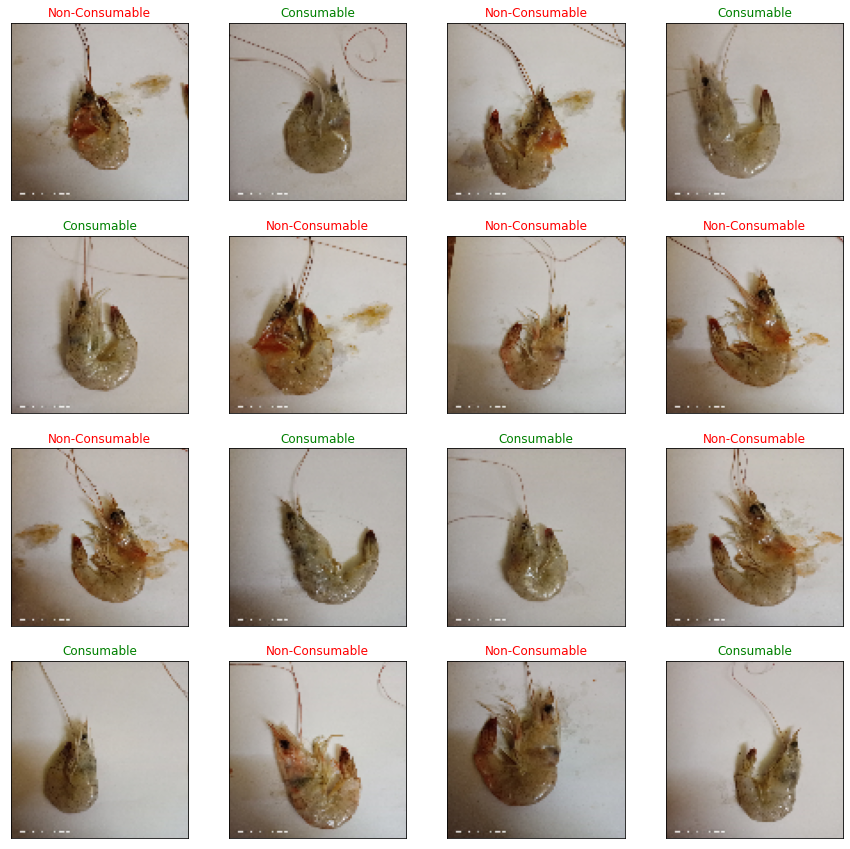

In [11]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [13]:
# Types of classes we have
labels.classes_
# print(image_data)

array(['Consumable', 'Non-Consumable'], dtype='<U14')

In [14]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 255.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [15]:
# Dimensionality Reduction of Train dataset
reshape_train_images = train_images.reshape(len(train_images), -1)
classifier.fit(reshape_train_images, train_labels)

GaussianNB()

In [16]:
# Dimensionality Reduction of Test dataset
reshape_test_images = test_images.reshape(len(test_images), -1)
test_labels_pred = classifier.predict(reshape_test_images)

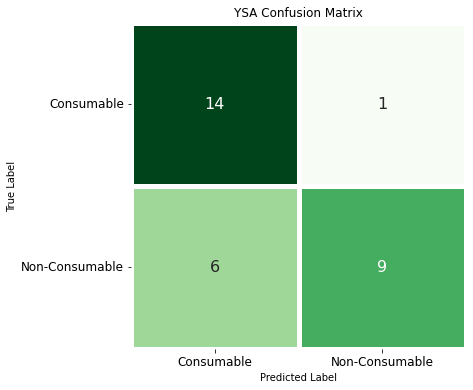

Accuracy in RGB Space: 76.666%


In [17]:
# Calculating Accuracy

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,test_labels_pred)

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
print("Accuracy in RGB Space: "+str(accuracy*100)[:6]+"%")

In [18]:
# Case 2: Prediction in HSV Color Space

In [19]:
# Converting BGR Images to HSV Color Space
start = time.time()
image_data = []
image_target = []
for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Time For Conversion",round(calculate_time,5))

Time For Conversion 24.2037


In [20]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(100, 100, 100, 3)

In [21]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [22]:
# Types of classes we have
labels.classes_
# print(image_data)

array(['Consumable', 'Non-Consumable'], dtype='<U14')

In [23]:
# Transforming image_data values within 0 to 1
X = image_data / 360.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [24]:
# Dimensionality Reduction of Train dataset
reshape_train_images = train_images.reshape(len(train_images), -1)
classifier.fit(reshape_train_images, train_labels)

GaussianNB()

In [25]:
# Dimensionality Reduction of Test dataset
reshape_test_images = test_images.reshape(len(test_images), -1)
test_labels_pred = classifier.predict(reshape_test_images)

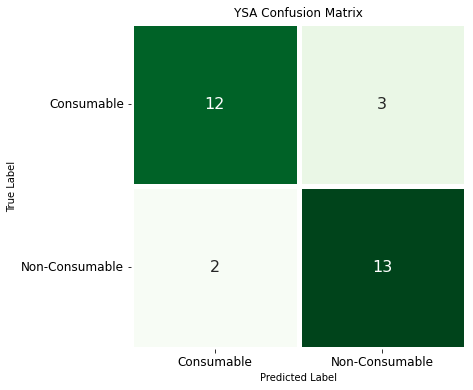

Accuracy in HSV Space: 83.333%


In [26]:
# Calculating Accuracy

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,test_labels_pred)

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
print("Accuracy in HSV Space: "+str(accuracy*100)[:6]+"%")